# Diabetes Prediction
## What is Diabetes?
Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. Learning how to use Machine Learning can help us predict Diabetes. Let’s get started!

## About this project :-

- The objective of this project is to classify whether someone has diabetes or not.
- Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
- The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
- The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

## About the Dataset

- Pregnancies :- Number of times a woman has been pregnant
- Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
- BloodPressure :- Diastollic Blood Pressure (mm hg)
- SkinThickness :- Triceps skin fold thickness(mm)
- Insulin :- 2 hour serum insulin(mu U/ml)
- BMI :- Body Mass Index ((weight in kg/height in m)^2)
- Age :- Age(years)
- DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)
- Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

# 1. Import Required Libraries

In [203]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 2. Loading the dataset

In [204]:
df=pd.read_csv("diabetes.csv")

# 3. Exploratory Data Analysis
## a. Understanding the dataset
- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

In [205]:
df.head() #get familier with dataset, display the top 5 data records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [206]:
df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(768, 9)

In [207]:
df.columns #learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [208]:
df.dtypes #knowledge of data type helps for computation

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [209]:
df.info() #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [210]:
df.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **CONCLUSION** :- We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846! We have to treat outliers.

## b. Data Cleaning
- Dropping duplicate values
- Checking NULL values
- Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.

Read more about this here :- https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4

In [211]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

In [212]:
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [213]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [214]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

# 4. Data Visualization
## Here we are going to plot :-
- Count Plot :- to see if the dataset is balanced or not
- Histograms :- to see if data is normally distributed or skewed
- Box Plot :- to analyse the distribution and see the outliers
- Scatter plots :- to understand relationship between any two variables
- Pair plot :- to create scatter plot between all the variables

<AxesSubplot:ylabel='count'>

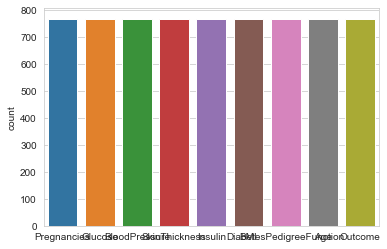

In [215]:
sns.countplot(data=df)

### **Conclusion** :- We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

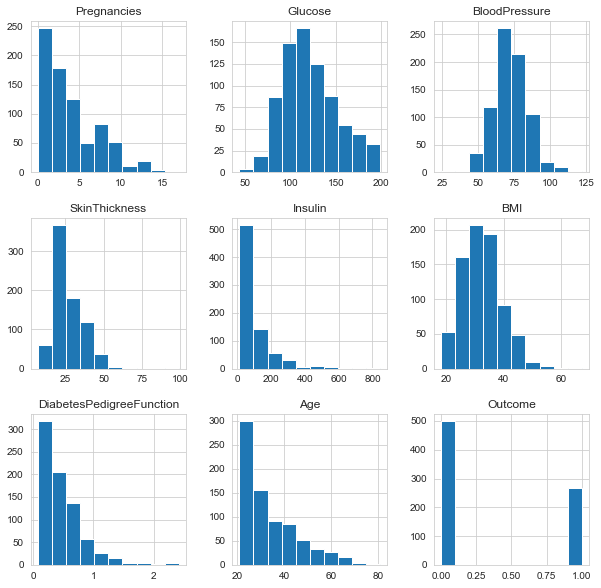

In [216]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

### **Conclusion** :- We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

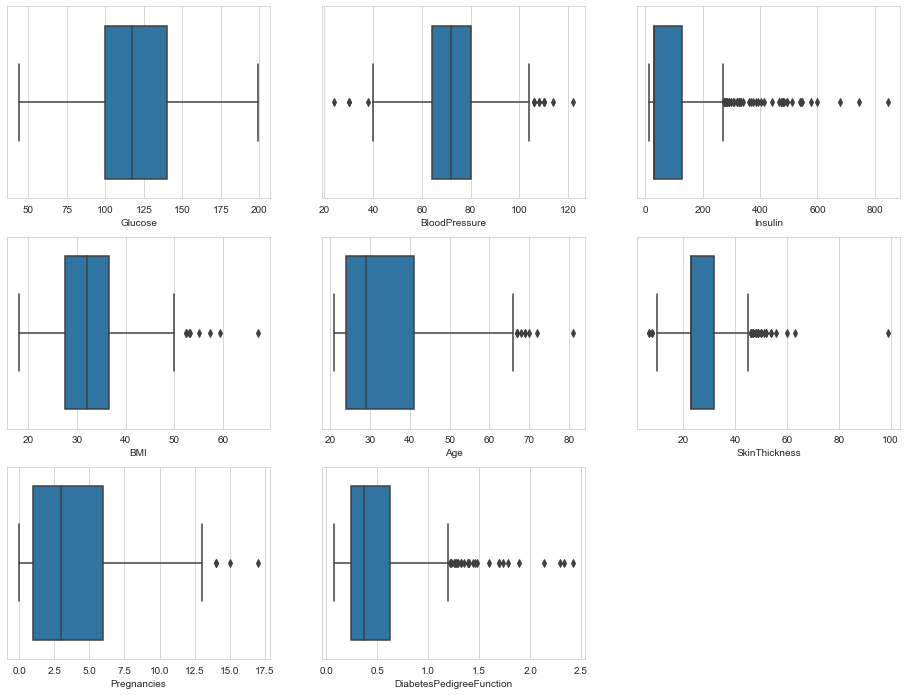

In [217]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Hence it is of utmost importance to deal with them. In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques.

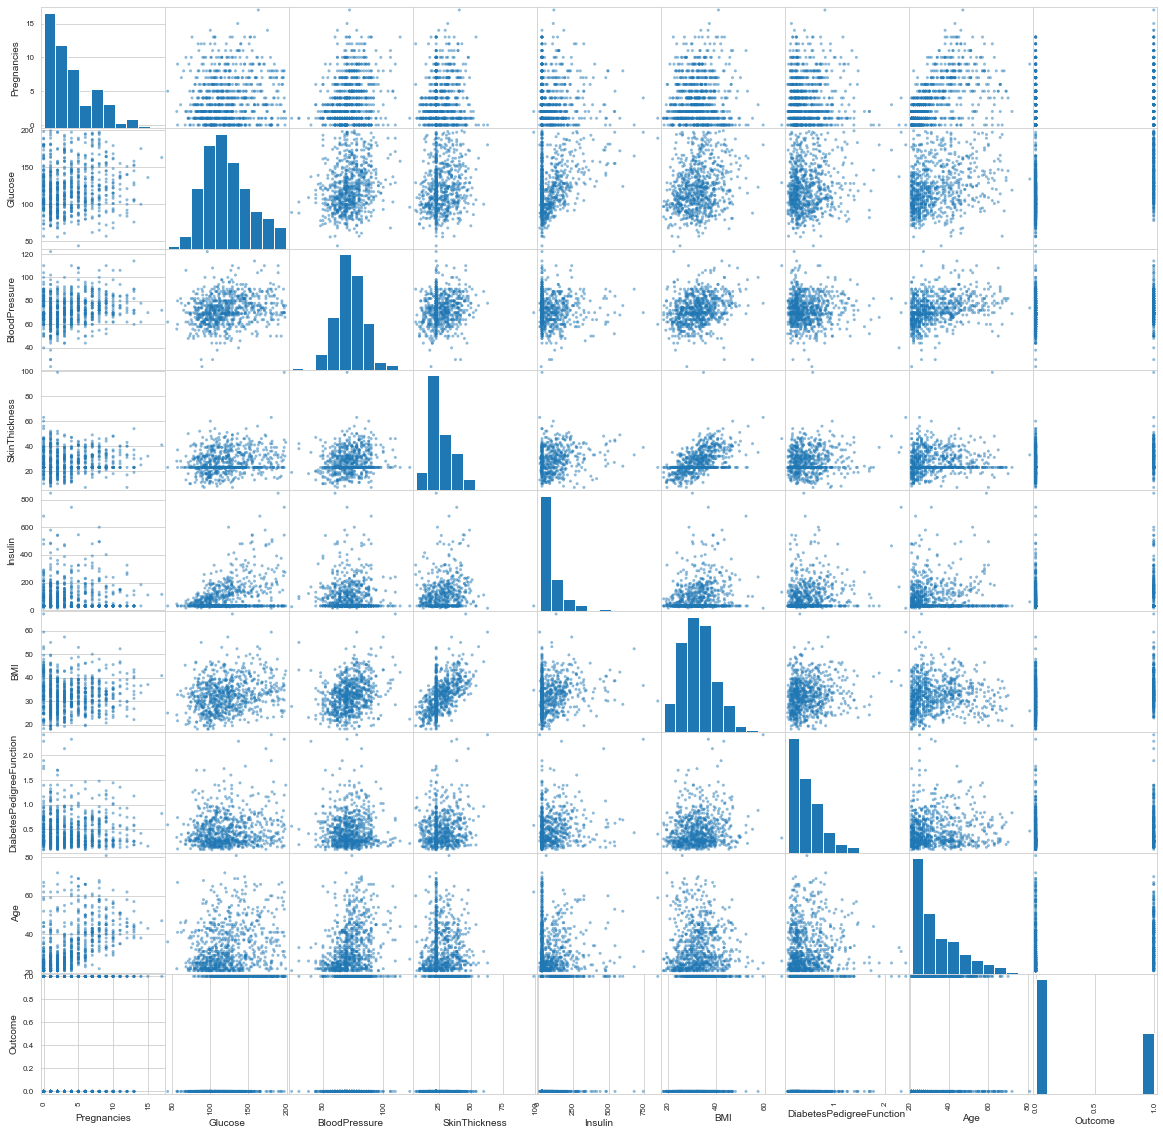

In [218]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));
# we can come to various conclusion looking at these plots for example  if you observe 5th plot in pregnancies with insulin, you can conclude that women with higher number of pregnancies have lower insulin

# 5. Feature Selection

**Pearson's Correlation Coefficient** : Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<AxesSubplot:>

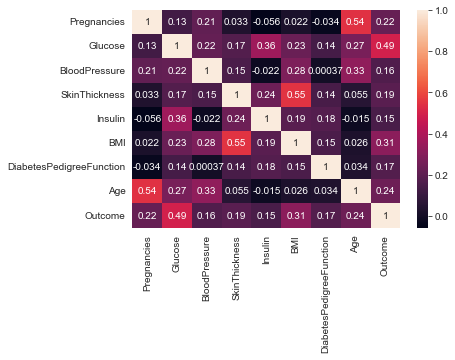

In [219]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

### **CONCLUSION** :- Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them. Read more about this here :- https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e I have used 3'rd technique method mentioned here.

In [220]:
df_selected=df.drop([],axis='columns')

# 6. Handling Outliers 

**1 — What is an Outlier?**

An outlier is a data point in a data set that is distant from all other observations.

**2 — How can we Identify an outlier?**

- Using Box plots

- Using Scatter plot

- Using Z score

I've used Box Plots above in data visualization step to detect outliers.

**3 — How am I treating the outliers ?**

Quantile Transformer :- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme. 


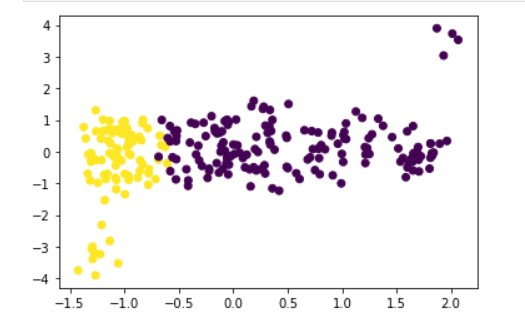
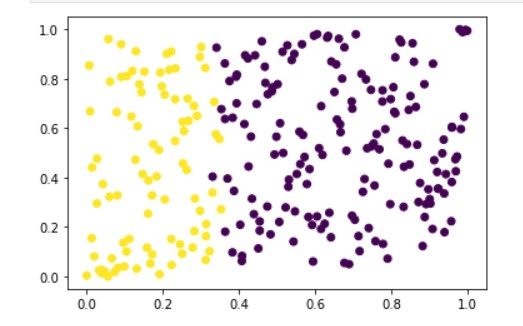
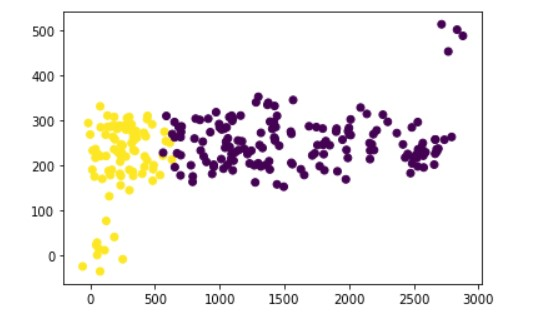

In [221]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
# print(x)
# quantile  = QuantileTransformer()

# X = quantile.fit_transform(x)
# print(X)
# df_new=quantile.transform(X)
df_new=pd.DataFrame(x)
df_new.columns =['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


<AxesSubplot:xlabel='BloodPressure'>

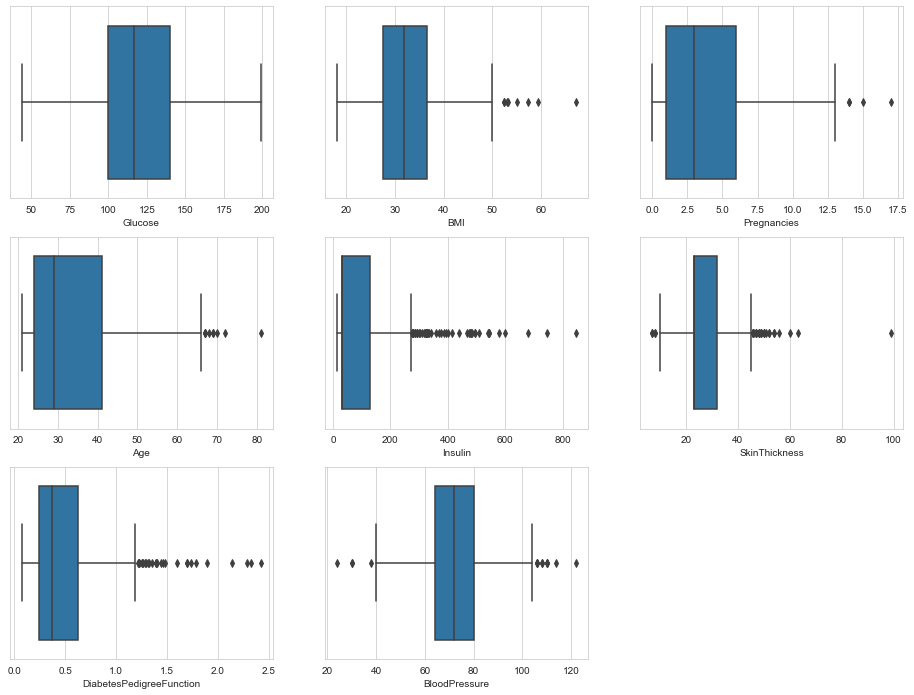

In [222]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['Insulin'],data=df_new)
plt.subplot(3,3,6)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)
plt.subplot(3,3,7)
sns.boxplot(x=df_new['DiabetesPedigreeFunction'],data=df_new)
plt.subplot(3,3,8)
sns.boxplot(x=df_new['BloodPressure'],data=df_new)

# 7. Split the Data Frame into X and y

In [223]:
target_name='Outcome'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [224]:
X.head() # contains only independent features 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33


In [225]:
y.head() #contains dependent feature

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# 8. TRAIN TEST SPLIT

- The train-test split is a technique for evaluating the performance of a machine learning algorithm.

- Train Dataset: Used to fit the machine learning model.
- Test Dataset: Used to evaluate the fit machine learning model.

- Common split percentages include:

Train: 80%, Test: 20%

Train: 67%, Test: 33%

Train: 50%, Test: 50%

I've used 80% train and 20% test

Read more about it here :- https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test
print(X_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
661            1    199.0           76.0             43     30.5  42.9   
122            2    107.0           74.0             30    100.0  33.6   
113            4     76.0           62.0             23     30.5  34.0   
14             5    166.0           72.0             19    175.0  25.8   
529            0    111.0           65.0             23     30.5  24.6   
..           ...      ...            ...            ...      ...   ...   
476            2    105.0           80.0             45    191.0  33.7   
482            4     85.0           58.0             22     49.0  27.8   
230            4    142.0           86.0             23     30.5  44.0   
527            3    116.0           74.0             15    105.0  26.3   
380            1    107.0           72.0             30     82.0  30.8   

     DiabetesPedigreeFunction  Age  
661                     1.394   22  
122                     0.404   23  


In [227]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [228]:
X_test.shape,y_test.shape

((154, 8), (154,))

# 9. Classification Algorithms

- KNN
- Naive Bayes
- SVM
- Decision Tree
- Random Forest
- Logistic Regression


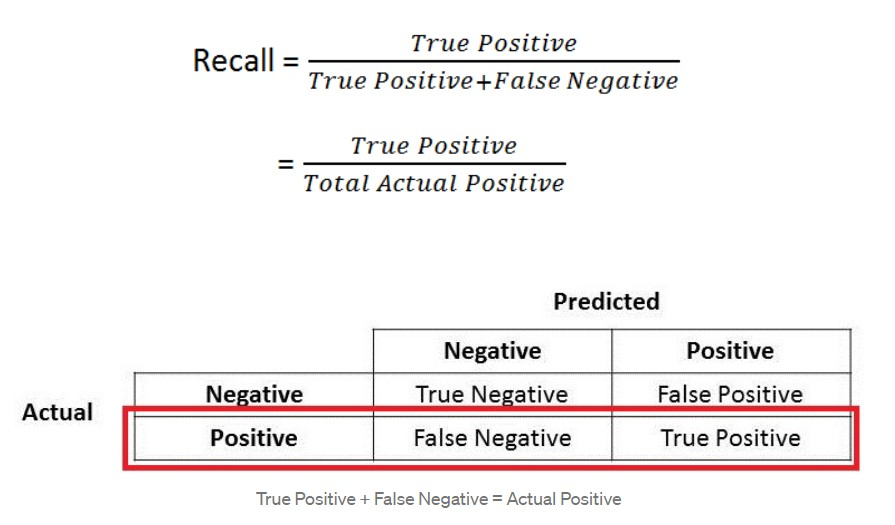
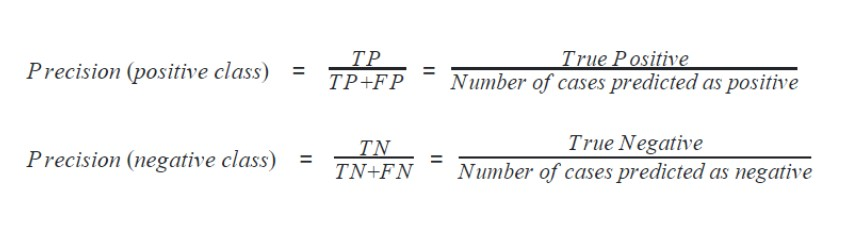
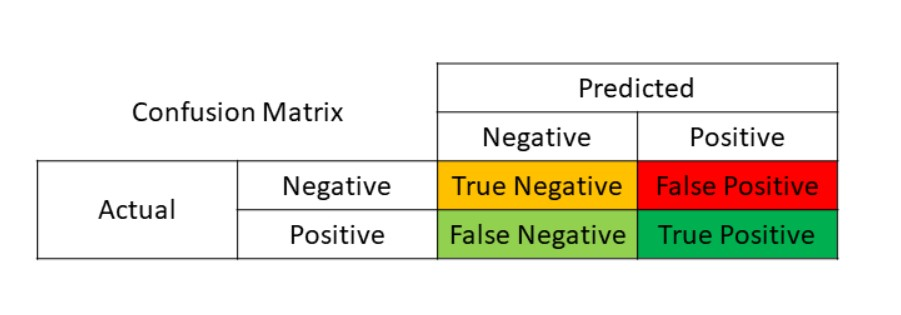
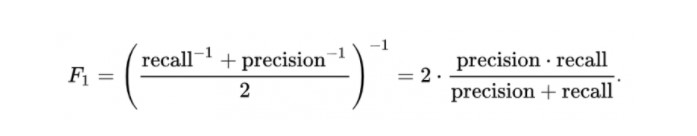

## 9.1 K Nearest Neighbours :-

KNN algorithm, is a non-parametric algorithm that classifies data points based on their proximity and association to other available data.

In [229]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.model_selection import GridSearchCV
import joblib

In [230]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [231]:
knn_model = grid_search.fit(X_train,y_train)

In [232]:
#Best Hyperparameters Value
print('Best leaf_size:', knn_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', knn_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', knn_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 15


In [233]:
#Predict testing set
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN model accuracy: {knn_accuracy}")

KNN model accuracy: 0.7857142857142857


Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       107
           1       0.65      0.64      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.78      0.79      0.79       154


 F1:
 0.6451612903225806

 Precision score is:
 0.6521739130434783

 Recall score is:
 0.6382978723404256

 Accuracy score:
 0.7857142857142857

 Confusion Matrix:



<AxesSubplot:>

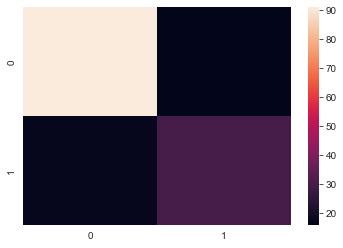

In [234]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Accuracy score:\n",knn_accuracy)
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

In [235]:
# save the model to a file
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

## 9.2 Naive Bayes :-

Naive Bayes is classification approach that adopts the principle of class conditional independence from the Bayes Theorem. This means that the presence of one feature does not impact the presence of another in the probability of a given outcome, and each predictor has an equal effect on that result

In [236]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import joblib

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [237]:
nb_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [238]:
nb_pred=nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes model accuracy: {nb_accuracy}")

Naive Bayes model accuracy: 0.7597402597402597


Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       107
           1       0.66      0.45      0.53        47

    accuracy                           0.76       154
   macro avg       0.72      0.67      0.69       154
weighted avg       0.75      0.76      0.74       154


 F1:
 0.5316455696202532

 Precision score is:
 0.65625

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



<AxesSubplot:>

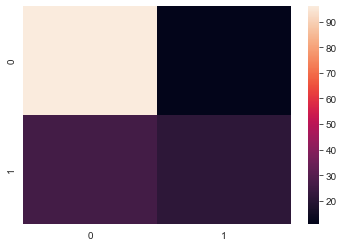

In [239]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

In [240]:
# save the model to a file
joblib.dump(nb_model, 'nb_model.pkl')

['nb_model.pkl']

# 9.3 Support Vector Machine :- 

It is typically leveraged for classification problems, constructing a hyperplane where the distance between two classes of data points is at its maximum. This hyperplane is known as the decision boundary, separating the classes of data points (e.g., has diabetes vs doesn't have diabetes ) on either side of the plane.

In [241]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
import joblib

In [242]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [243]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [244]:
svm_result = grid_search.fit(X, y)

In [245]:
svm_model= grid_search.fit(X_train, y_train)

In [246]:
svm_pred=svm_result.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM model accuracy: {svm_accuracy}")

SVM model accuracy: 0.8051948051948052


Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       107
           1       0.76      0.53      0.62        47

    accuracy                           0.81       154
   macro avg       0.79      0.73      0.75       154
weighted avg       0.80      0.81      0.79       154


 F1:
 0.6451612903225806

 Precision score is:
 0.6521739130434783

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



<AxesSubplot:>

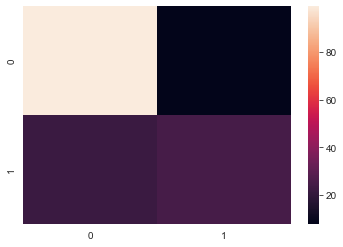

In [247]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

In [248]:
# save the model to a file
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

## 9.4 Decision Tree 

In [249]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
import joblib

In [250]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [251]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [252]:
dt_model=grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [253]:
dt_pred=dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree model accuracy: {dt_accuracy}")

Decision Tree model accuracy: 0.7922077922077922


Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86       107
           1       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



<AxesSubplot:>

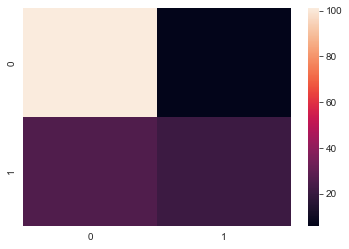

In [254]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))

In [255]:
# save the model to a file
joblib.dump(dt_model, 'dt_model.pkl')

['dt_model.pkl']

## 9.5 Random Forest :- 
The "forest" references a collection of uncorrelated decision trees, which are then merged together to reduce variance and create more accurate data predictions.

In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import joblib

In [257]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [258]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [259]:
rf_model = grid_search.fit(X_train, y_train)

In [260]:
rf_pred=rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest model accuracy: {rf_accuracy}")

Random Forest model accuracy: 0.8181818181818182


Classification Report is:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.69      0.72      0.71        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154


 F1:
 0.6451612903225806

 Precision score is:
 0.6521739130434783

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



<AxesSubplot:>

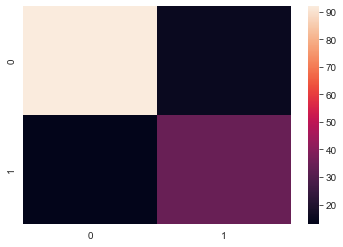

In [261]:
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_pred))

In [262]:
# save the model to a file
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

## 9.6 Logistic Regression:- 
Logistical regression is selected when the dependent variable is categorical, meaning they have binary outputs, such as "true" and "false" or "yes" and "no." 

Logistic regression does not really have any critical hyperparameters to tune. Sometimes, you can see useful differences in performance or convergence with different solvers (solver).Regularization (penalty) can sometimes be helpful.

In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
import joblib

In [264]:
reg = LogisticRegression()
reg.fit(X_train,y_train)                         

LogisticRegression()

In [265]:
lr_pred=reg.predict(X_test)
reg_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression model accuracy: {reg_accuracy}")

Logistic Regression model accuracy: 0.7922077922077922


Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       107
           1       0.68      0.60      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.6363636363636364

 Precision score is:
 0.6829268292682927

 Recall score is:
 0.5957446808510638

 Confusion Matrix:



<AxesSubplot:>

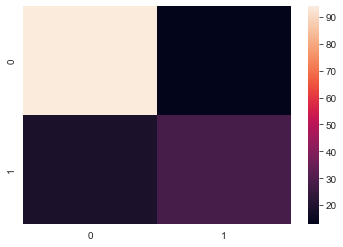

In [266]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))

In [267]:
# Save the trained model to a file
joblib.dump(reg, "reg_model.pkl")

['reg_model.pkl']

In [268]:
Pregnancies = float(input("how many time woman are pregnant and you are a man so please enter 0 :"))
Glucose = float(input("your glucose level :"))
BloodPressure = float(input("your BloodPressure :"))
SkinThickness = float(input("enter your skin thickness in mm :"))
Insulin = float(input("Efficacy of 2-hour post glucose insulin levels :"))
BMI = float(input("Enter your Body Mass Index (weight in kg/height in m) :"))
DiabetesPedigreeFunction = float(input("scores likelihood of diabetes based on family history (number of diabetic person / total number of family member) :"))
Age = float(input("you age :"))

if ( DiabetesPedigreeFunction < 1 and DiabetesPedigreeFunction > 1):
  DiabetesPedigreeFunction = 1.0

# test the model on your own list
X_new = [[Pregnancies ,Glucose ,BloodPressure ,SkinThickness ,Insulin ,BMI ,DiabetesPedigreeFunction ,Age ]]

y_new_knn = knn_model.predict(X_new)
y_new_nb = nb_model.predict(X_new)
y_new_svm = svm_result.predict(X_new)
y_new_dt = dt_model.predict(X_new)
y_new_rf = rf_model.predict(X_new)
y_new_reg = reg.predict(X_new)

y_new = [y_new_knn[0], y_new_nb[0], y_new_svm[0], y_new_dt[0], y_new_rf[0], y_new_reg[0]]
algo = ["K Nearest Neighbours algorithem", "naive bayes algorithem", "support vector machine algorithem", "Decision Tree algorithem", "Random Forest algorithem", "Logistic Regression algorithem"]
accuracy = [knn_accuracy, nb_accuracy, svm_accuracy, dt_accuracy, rf_accuracy, reg_accuracy]

count_0 = 0
list_0 = []
count_1 = 0 
list_1 = []

for i in range(0, len(y_new)):
  if (y_new[i] == 0):
    count_0 = count_0 + 1
    list_0.append(i)
  else:
    count_1 = count_1 + 1
    list_1.append(i)

if (count_0 == count_1):
  accuracy_0 = []
  accuracy_1 = []
  
  for i in range(len(list_0)):
    accuracy_0.append(accuracy[list_0[i]])

  for i in range(len(list_1)):
    accuracy_1.append(accuracy[list_1[i]])

  max_accuracy_0 = max(accuracy_0)
  max_accuracy_0_index = accuracy_0.index(max_accuracy_0)

  max_accuracy_1 = max(accuracy_1)
  max_accuracy_1_index = accuracy_1.index(max_accuracy_1)

  if (max_accuracy_0 > max_accuracy_1):
    print("result is genrated by " + algo[list_0[max_accuracy_0_index]])
    print("you are not diabatic person.")
  else :
    print("result is genrated by " + algo[list_1[max_accuracy_1_index]])
    print("you are diabatic person.")

if (count_0 > count_1):
  accuracy_0 = []
  for i in range(len(list_0)):
    accuracy_0.append(accuracy[list_0[i]])

  max_accuracy_0 = max(accuracy_0)
  max_accuracy_0_index = accuracy_0.index(max_accuracy_0)

  print("result is genrated by " + algo[list_0[max_accuracy_0_index]])
  print("you are not diabatic person.")
  
if (count_0 < count_1):
  accuracy_1 = []
  for i in range(len(list_1)):
    accuracy_1.append(accuracy[list_1[i]])

  max_accuracy_1 = max(accuracy_1)
  max_accuracy_1_index = accuracy_1.index(max_accuracy_1)

  print("result is genrated by " + algo[list_1[max_accuracy_1_index]])
  print("you are diabatic person.")

result is genrated by Random Forest algorithem
you are not diabatic person.


## GUI

In [269]:
import tkinter as tk
import numpy as np
import joblib

# Load the trained models and their respective accuracies
knn_model = joblib.load('knn_model.pkl')
nb_model = joblib.load('nb_model.pkl')
svm_model = joblib.load('svm_model.pkl')
dt_model = joblib.load('dt_model.pkl')
rf_model = joblib.load('rf_model.pkl')
reg_model = joblib.load('reg_model.pkl')

knn_accuracy = 0.75
nb_accuracy = 0.82
svm_accuracy = 0.79
dt_accuracy = 0.69
rf_accuracy = 0.77
reg_accuracy = 0.81

# Create the GUI window
root = tk.Tk()
root.title("Diabetes Prediction")

# Create the input labels and entry fields
pregnancies_label = tk.Label(root, text="Pregnancies:")
pregnancies_entry = tk.Entry(root)

glucose_label = tk.Label(root, text="Glucose:")
glucose_entry = tk.Entry(root)

bp_label = tk.Label(root, text="Blood Pressure:")
bp_entry = tk.Entry(root)

skin_label = tk.Label(root, text="Skin Thickness:")
skin_entry = tk.Entry(root)

insulin_label = tk.Label(root, text="Insulin:")
insulin_entry = tk.Entry(root)

bmi_label = tk.Label(root, text="BMI:")
bmi_entry = tk.Entry(root)

dpf_label = tk.Label(root, text="Diabetes Pedigree Function:")
dpf_entry = tk.Entry(root)

age_label = tk.Label(root, text="Age:")
age_entry = tk.Entry(root)

# Create the prediction result label
result_label = tk.Label(root, text="", font=("Arial", 16, "bold"))

# Place the input labels and entry fields in the window
pregnancies_label.grid(row=0, column=0)
pregnancies_entry.grid(row=0, column=1)

glucose_label.grid(row=1, column=0)
glucose_entry.grid(row=1, column=1)

bp_label.grid(row=2, column=0)
bp_entry.grid(row=2, column=1)

skin_label.grid(row=3, column=0)
skin_entry.grid(row=3, column=1)

insulin_label.grid(row=4, column=0)
insulin_entry.grid(row=4, column=1)

bmi_label.grid(row=5, column=0)
bmi_entry.grid(row=5, column=1)

dpf_label.grid(row=6, column=0)
dpf_entry.grid(row=6, column=1)

age_label.grid(row=7, column=0)
age_entry.grid(row=7, column=1)

result_label.grid(row=8, column=0, columnspan=2)

def predict_diabetes():
    # Get the user inputs and convert them to float
    pregnancies = float(pregnancies_entry.get())
    glucose = float(glucose_entry.get())
    bp = float(bp_entry.get())
    skin = float(skin_entry.get())
    insulin = float(insulin_entry.get())
    bmi = float(bmi_entry.get())
    dpf = float(dpf_entry.get())
    age = float(age_entry.get())
    
    # create input array
    X_new = [[pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]]

    # generate predictions using machine learning models
    y_new_knn = knn_model.predict(X_new)
    y_new_nb = nb_model.predict(X_new)
    y_new_svm = svm_model.predict(X_new)
    y_new_dt = dt_model.predict(X_new)
    y_new_rf = rf_model.predict(X_new)
    y_new_reg = reg_model.predict(X_new)

    # Calculate the prediction confidence based on model accuracy
    confidence_knn = knn_accuracy
    confidence_nb = nb_accuracy
    confidence_svm = svm_accuracy
    confidence_dt = dt_accuracy
    confidence_rf = rf_accuracy
    confidence_reg = reg_accuracy

    # Determine the final prediction based on the highest confidence level
    max_confidence = max(confidence_knn, confidence_nb, confidence_svm, confidence_dt, confidence_rf, confidence_reg)
    if max_confidence == confidence_knn:
        y_pred = y_new_knn
        accuracy = confidence_knn
        model_name = "KNN"
    elif max_confidence == confidence_nb:
        y_pred = y_new_nb
        accuracy = confidence_nb
        model_name = "Naive Bayes"
    elif max_confidence == confidence_svm:
        y_pred = y_new_svm
        accuracy = confidence_svm
        model_name = "SVM"
    elif max_confidence == confidence_dt:
        y_pred = y_new_dt
        accuracy = confidence_dt
        model_name = "Decision Tree"
    elif max_confidence == confidence_rf:
        y_pred = y_new_rf
        accuracy = confidence_rf
        model_name = "Random Forest"
    else:
        y_pred = y_new_reg
        accuracy = confidence_reg
        model_name = "Regression"

    # Display the prediction result
    if y_pred[0] == 1:
        result_label.config(text="You have diabetes.", fg="red")
    else:
        result_label.config(text="You do not have diabetes.", fg="green")

    result_label.config(text=f"Prediction Result: {model_name} model predicted that you {['do not have', 'have'][y_pred[0]]} diabetes with {round(accuracy*100,2)}% accuracy.", fg="black")

# Create the predict button
predict_button = tk.Button(root, text="Predict", command=predict_diabetes)
predict_button.grid(row=9, column=0, columnspan=2)

# Start the GUI
root.mainloop()
